
<img src="https://dsiag.ch/images/dsi_rgb.png" alt="dsi logo" width="100" style="position: absolute; right: 0px;"/>

# Basic Cluster Analyis with scikit learn

Beispiel zur einfachen Clustering der Daten aus dem Iris Datenset mittels scikit-learn.



# Iris Datenset


Im Beispiel wird mit dem [Iris Datenset][Iris] von 1936 gearbeitet. Das Datenset besteht aus 150 Einträgen zu Iris Blumen. Vier verschiedene Merkmale sind pro Eintrag vorhanden. Jeder Datensatz gehört zu einer von drei Iris Arten. 

[Iris]: https://en.wikipedia.org/wiki/Iris_flower_data_set 

## Datenset laden

Das Datenset ist direkt in scikit learn verfügbar.


In [2]:
from sklearn import datasets

iris = datasets.load_iris()

## Drei Klassen 

Die Klassen (Iris Unterarten) sind im Feld `target_names` abrufbar.

In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']



| Iris Setosa      | Iris Versicolor    | Iris virginica    |
| :------------- | :----------: | -----------: |
|  ![][setosa] | ![][versicolor]   | ![][virginica]  |


[setosa]: https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg
[versicolor]: https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg
[virginica]: https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg




## 150x4 Datenpunkte

Merkmale sind die jeweils Länge und Breite von Sepal und Petal

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/220px-Petal-sepal.jpg)

## Datenpunkte plotten

Da das Iris Datenset aus vier Dimensionalen Daten besteht lässt es sich nicht einfach plotten. Eine Möglichkeit ist es, zwei Dimensionen auszuwählen und einen Scatter plot zu machen. Zum Beispiel wenn nur Sepal Länge und Breite berücksichtigt wird.

Zum Plotten wird die Library [matplotlib](https://matplotlib.org/) verwendet.

In [29]:
import matplotlib.pyplot as plt

def generate_fig(): 
    fig, ax = plt.subplots(1,2, figsize = (15, 7))
    ax[0].set_xlabel("Sepal Length")
    ax[0].set_ylabel("Sepal Width")
    ax[1].set_xlabel("Petal Length")
    ax[1].set_ylabel("Petal Width")
    return ax

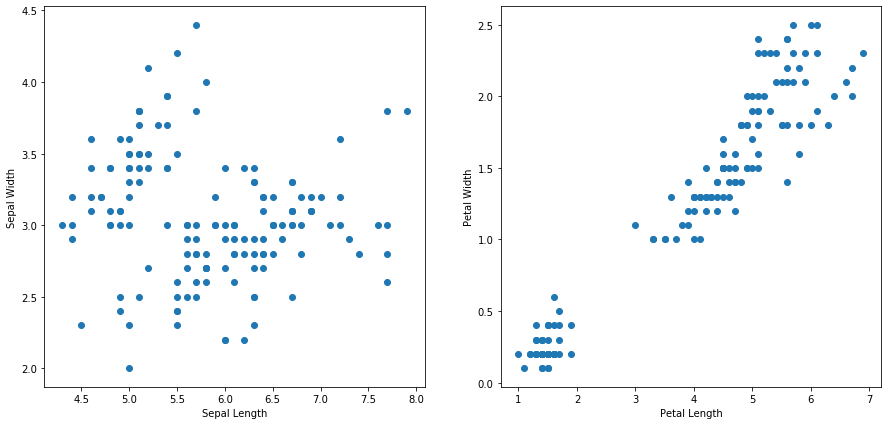

In [30]:
ax = generate_fig()

ax[0].scatter([x[0] for x in iris.data], [x[1] for x in iris.data])
ax[1].scatter([x[2] for x in iris.data], [x[3] for x in iris.data])

plt.show()

# K-Means Clustering

Beim [K-Means Clustering][kmeans] muss die Anzahl Cluster (n_clusters) fix gesetzt werden. Hier wird sie auf drei gesetzt, wodurch der Algorithmus die Daten in drei Cluster aufteilt


[kmeans]: https://scikit-learn.org/stable/modules/clustering.html#k-means

In [5]:
from sklearn.cluster import KMeans

y_pred_kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(iris.data)

In [6]:
y_pred_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## Plotten der Cluster

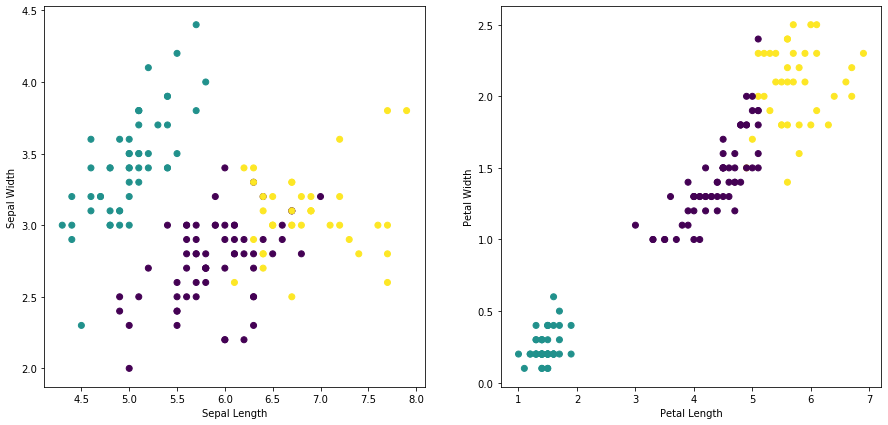

In [31]:
ax = generate_fig()

ax[0].scatter([x[0] for x in iris.data], [x[1] for x in iris.data], c=y_pred_kmeans)
ax[1].scatter([x[2] for x in iris.data], [x[3] for x in iris.data], c=y_pred_kmeans)
plt.show()

### Plotten der Klassen

Da für das Iris Datenset die Klassen bekannt sind können diese mit dem Clustering verglichen werden

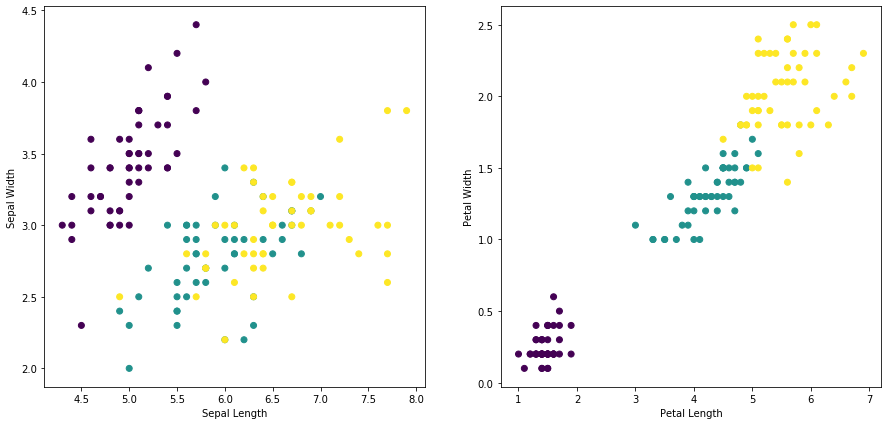

In [47]:
ax = generate_fig()

ax[0].scatter([x[0] for x in iris.data], [x[1] for x in iris.data], c=iris.target)
ax[1].scatter([x[2] for x in iris.data], [x[3] for x in iris.data], c=iris.target)
plt.show()

# <span style="color:green">Aufgabe: Visualisierung prüfen

**Frage 1)** Passt das Clustering auf die bestehenden Klassen Setosa Versicolor und Virginic


**Frage 2)** Wo würden die Cluster-Grenze "von Hand" gezogen?
</span>


# Evaluation

Für die Evaluation verwenden wir verschiedene Metriken. Details zu den Metriken findet sich in der [scikit-learn Dokumentation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

In [9]:
from sklearn import metrics

## Rand Index

Da die Klassen bekannt ist, kann überprüft werden, ob die gefundenen Cluster mit den Klassen überein stimmen. Zum Beispiel mit dem Rand Index

In [10]:
rand_score = metrics.adjusted_rand_score(iris.target, y_pred_kmeans)

print("Rand Index für K-Means Clustering: " + str(rand_score))

Rand Index für K-Means Clustering: 0.7302382722834697


## Silhouette Coefficient


Auch wenn die Klassen nicht bekannt ist, gibt es Metriken, die die Qualität des Clusterings messen. Zum Beispiel mit  Silhouette Coefficient Score. Je grösser der Score, desto besser das Clustering.

In [11]:
metrics.silhouette_score(iris.data, y_pred_kmeans)

0.5528190123564091

# <span style="color:green">Bonus-Aufgabe: Hands-on </span>


- Einen anderen [Clustering Algorithmus][clustering] verwenden. Ist die Perfomance besser als K-Means?


[clustering]: https://scikit-learn.org/stable/modules/clustering.html

